## Churn - model_selection - prediction


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('train.csv')

train_data.sample(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
2246,FL,108,area_code_510,no,no,0,210.7,112,35.82,238.7,73,20.29,253.6,90,11.41,9.2,5,2.48,3,no
6,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
2637,HI,108,area_code_415,no,no,0,291.6,99,49.57,221.1,93,18.79,229.2,110,10.31,14.0,9,3.78,2,yes
3600,OK,103,area_code_510,no,no,0,267.0,97,45.39,204.3,151,17.37,246.9,67,11.11,11.3,7,3.05,1,yes
1005,VT,100,area_code_415,no,yes,25,215.9,90,36.70,257.9,92,21.92,180.2,157,8.11,11.6,4,3.13,1,no
1720,IA,130,area_code_510,no,no,0,139.1,72,23.65,246.0,112,20.91,207.2,121,9.32,11.4,9,3.08,5,no
3693,SD,56,area_code_415,no,no,0,79.3,115,13.48,159.0,64,13.52,245.7,99,11.06,10.1,4,2.73,1,no
1729,IA,105,area_code_510,no,yes,15,88.1,125,14.98,175.9,142,14.95,269.9,85,12.15,9.7,1,2.62,2,no
1775,CT,33,area_code_510,no,no,0,182.5,65,31.03,232.1,96,19.73,149.2,82,6.71,7.5,2,2.03,2,no
1599,WI,147,area_code_415,yes,no,0,225.2,111,38.28,184.9,98,15.72,143.2,146,6.44,9.9,1,2.67,0,yes


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

Выделим матрицу признаков и вектор с целевой переменной в тренировочной выборке

<AxesSubplot:>

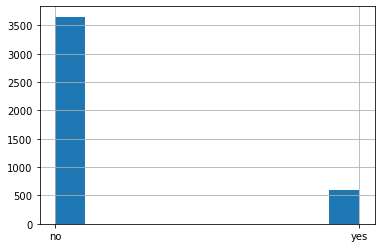

In [4]:
train_data.churn.hist()

In [5]:
train_data['churn'] = train_data.churn.apply(lambda x: 1 if x == 'yes' else 0)

In [6]:
train_data.sample(7)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
3575,TN,78,area_code_415,yes,no,0,71.5,126,12.16,166.8,127,14.18,211.6,86,9.52,8.3,2,2.24,3,1
665,AZ,113,area_code_415,no,yes,32,180.4,89,30.67,129.4,124,11.00,166.9,124,7.51,8.4,2,2.27,1,0
1500,IL,85,area_code_415,no,yes,29,144.6,97,24.58,140.0,102,11.90,165.4,148,7.44,10.9,3,2.94,1,0
1781,MA,71,area_code_510,no,no,0,290.4,108,49.37,253.9,92,21.58,263.3,126,11.85,10.1,5,2.73,3,1
658,AL,90,area_code_415,no,no,0,214.9,97,36.53,117.8,117,10.01,133.7,78,6.02,11.8,2,3.19,2,0
1864,RI,113,area_code_415,no,no,0,90.6,130,15.40,170.6,100,14.50,137.4,74,6.18,5.4,9,1.46,1,0
2747,WA,121,area_code_510,no,no,0,255.1,93,43.37,266.9,97,22.69,197.7,118,8.90,8.8,3,2.38,3,1


In [7]:
num_cols = []
str_cols = []

cols_and_type = train_data.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] in ('int64', 'float64'):
        num_cols.append(col)
    else: 
        str_cols.append(col)
        
print(num_cols)

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls', 'churn']


In [8]:
cols_and_type

{'state': dtype('O'),
 'account_length': dtype('int64'),
 'area_code': dtype('O'),
 'international_plan': dtype('O'),
 'voice_mail_plan': dtype('O'),
 'number_vmail_messages': dtype('int64'),
 'total_day_minutes': dtype('float64'),
 'total_day_calls': dtype('int64'),
 'total_day_charge': dtype('float64'),
 'total_eve_minutes': dtype('float64'),
 'total_eve_calls': dtype('int64'),
 'total_eve_charge': dtype('float64'),
 'total_night_minutes': dtype('float64'),
 'total_night_calls': dtype('int64'),
 'total_night_charge': dtype('float64'),
 'total_intl_minutes': dtype('float64'),
 'total_intl_calls': dtype('int64'),
 'total_intl_charge': dtype('float64'),
 'number_customer_service_calls': dtype('int64'),
 'churn': dtype('int64')}

In [9]:
train_data[num_cols].describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,0.140706
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,0.347759
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


## Построим графики, посмотрим на распределение признаков

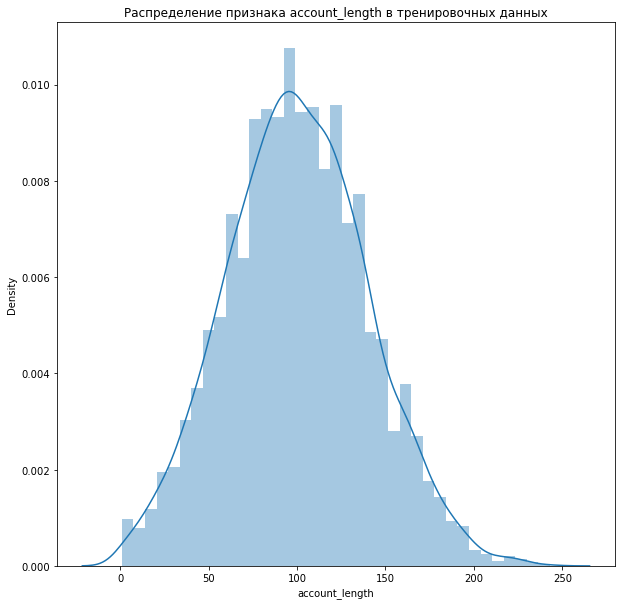

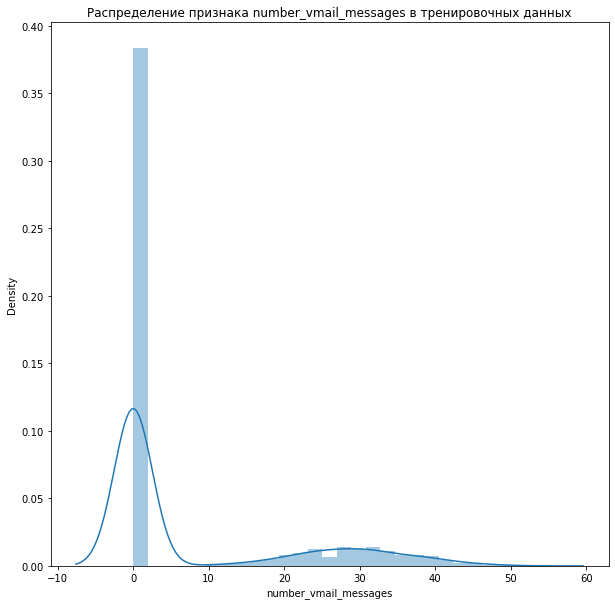

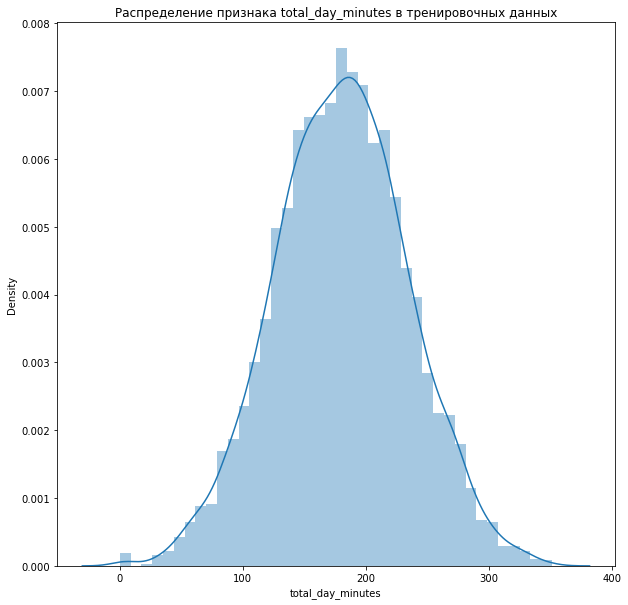

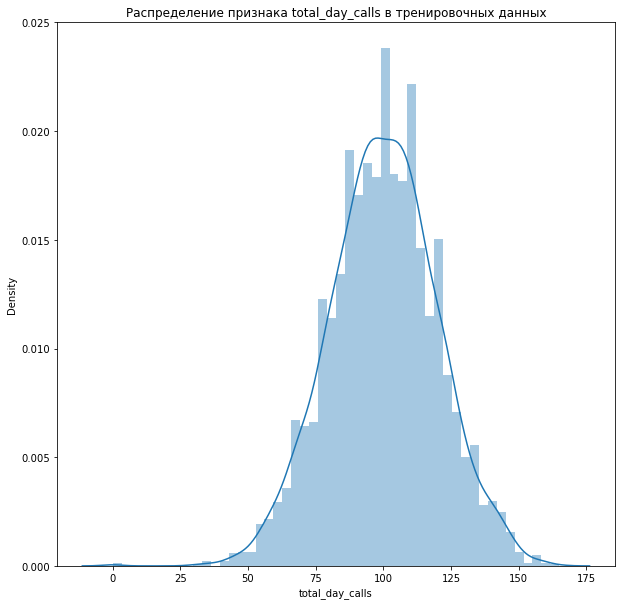

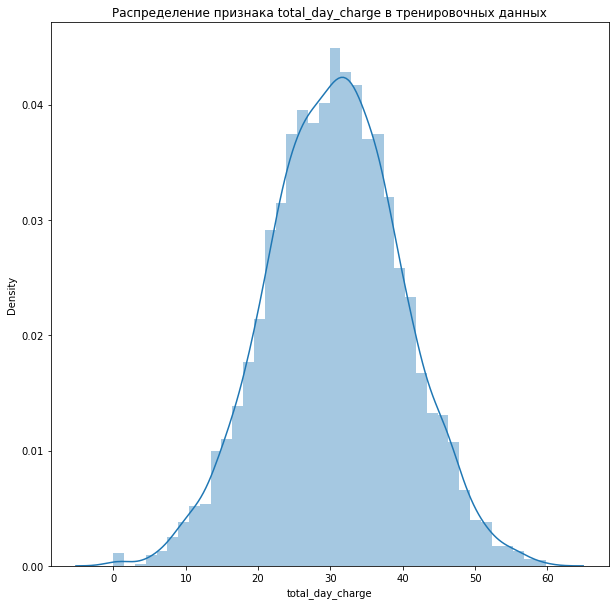

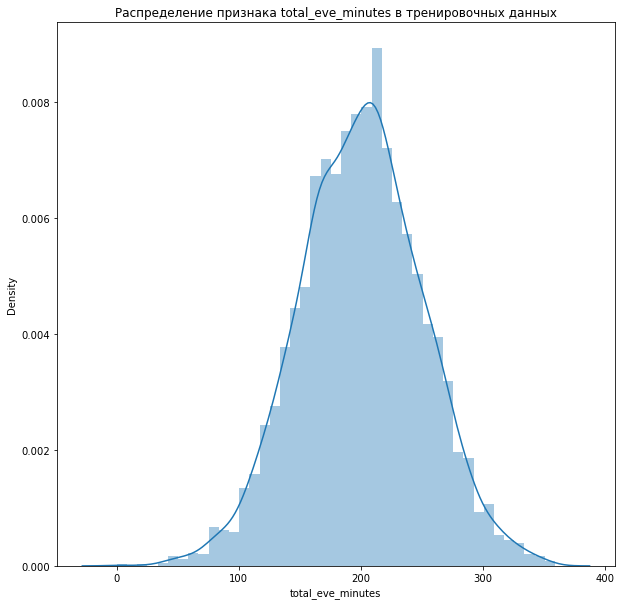

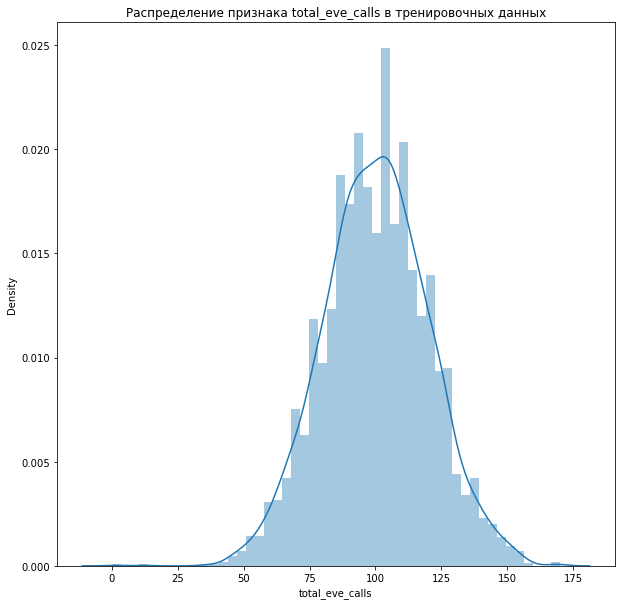

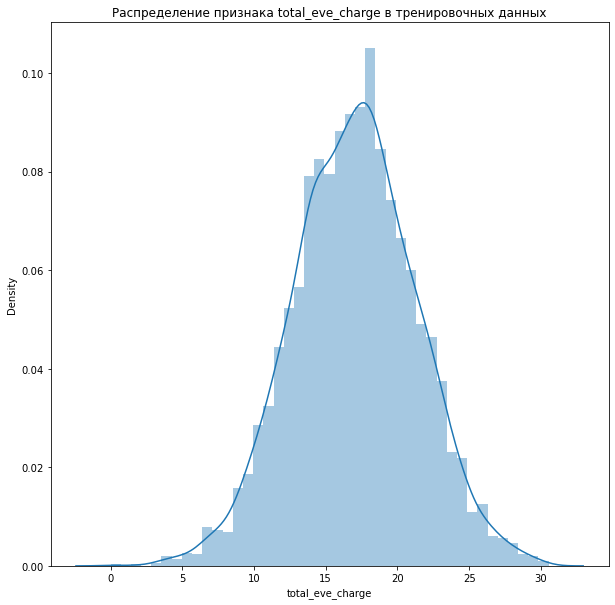

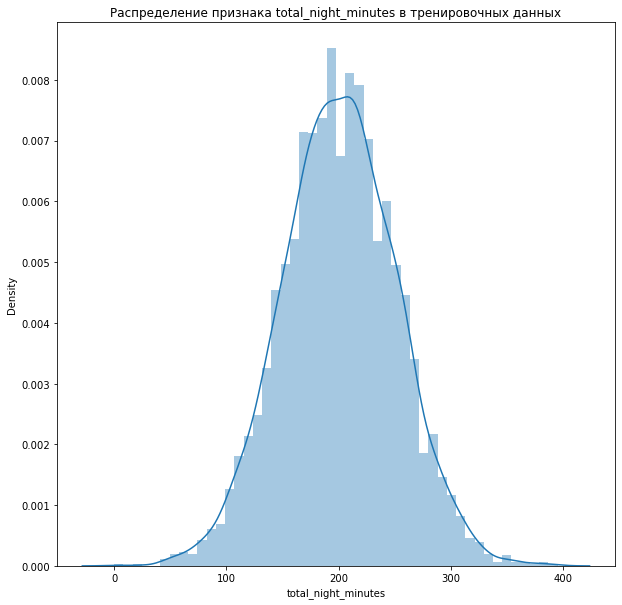

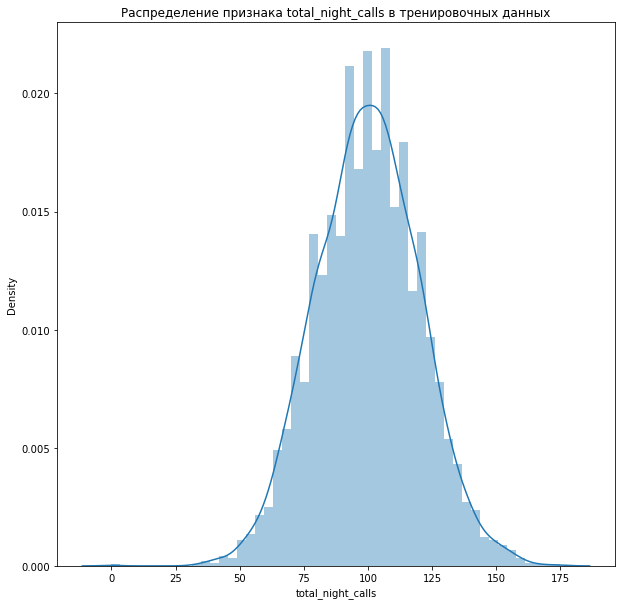

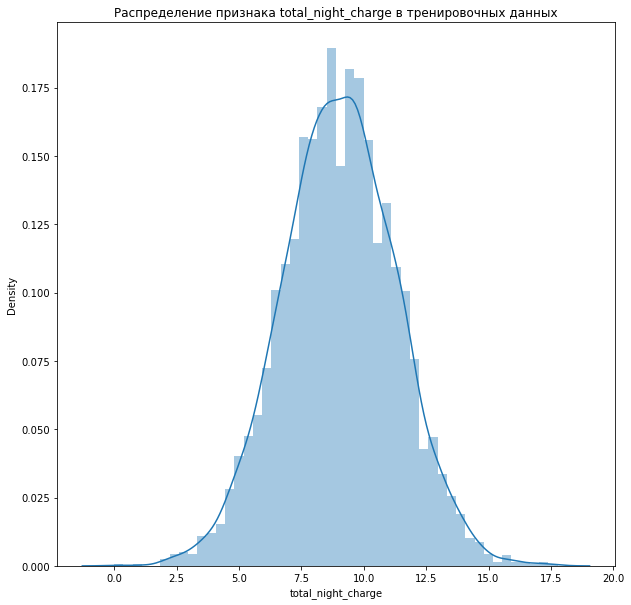

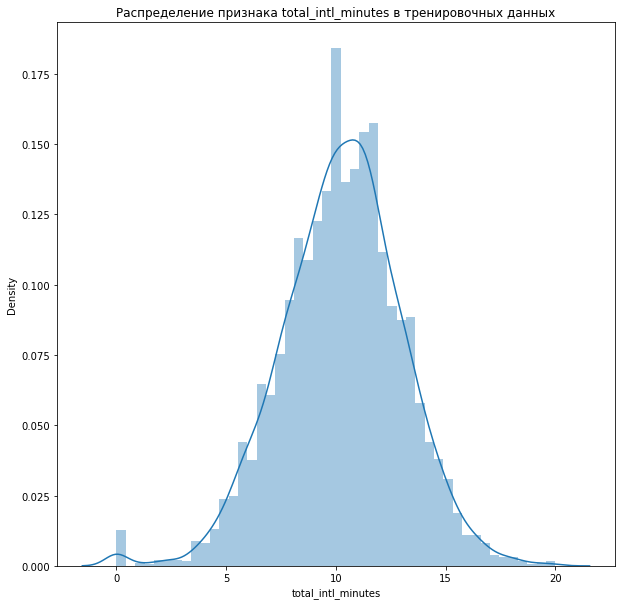

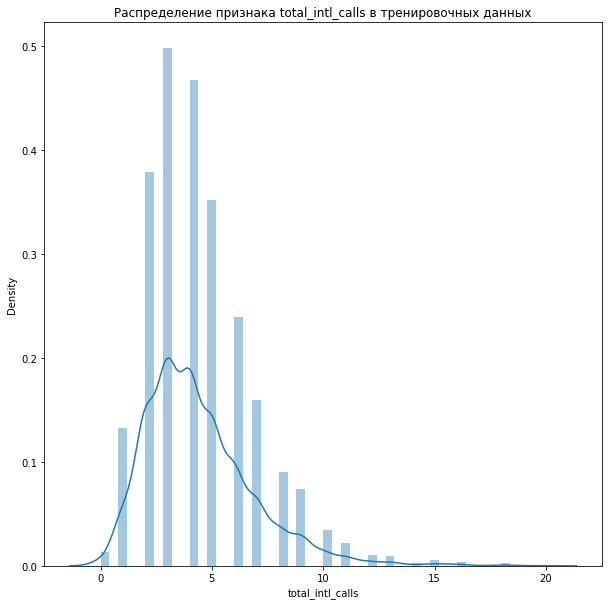

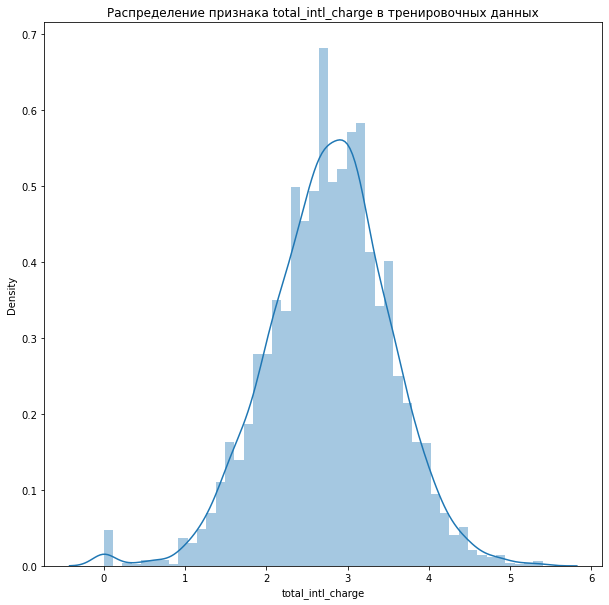

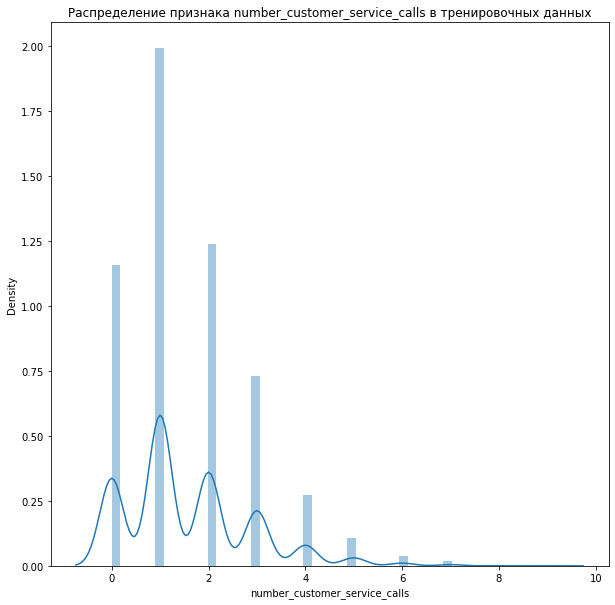

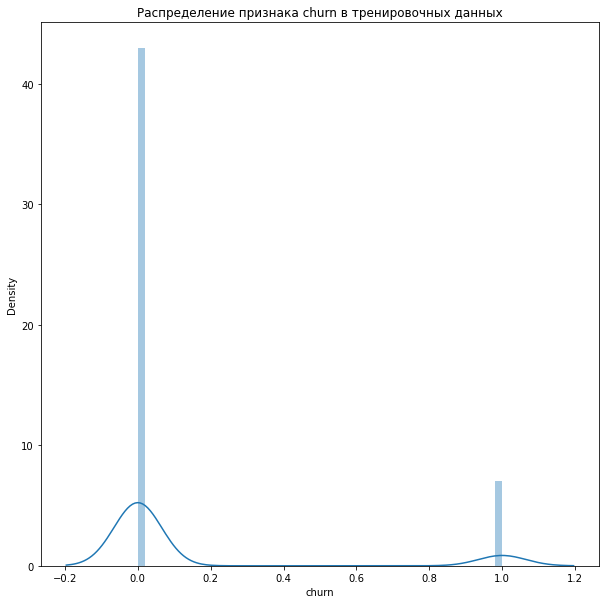

In [10]:
for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(train_data[col])

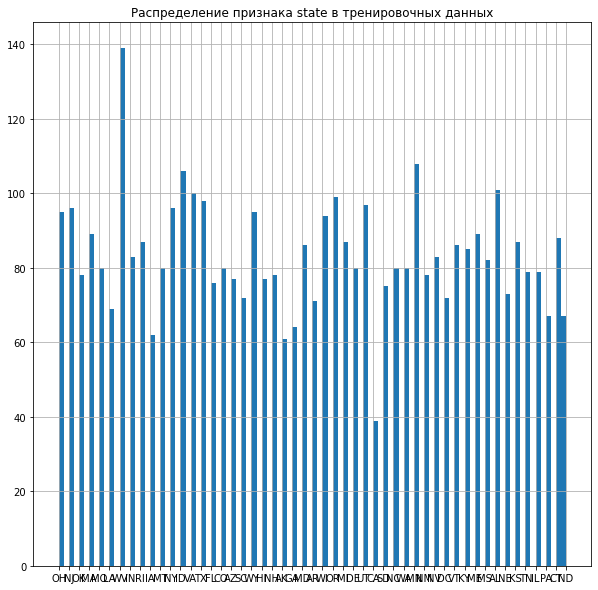

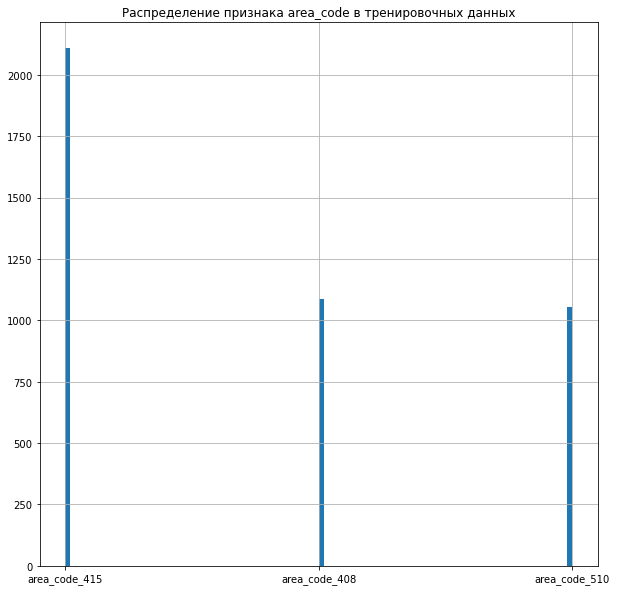

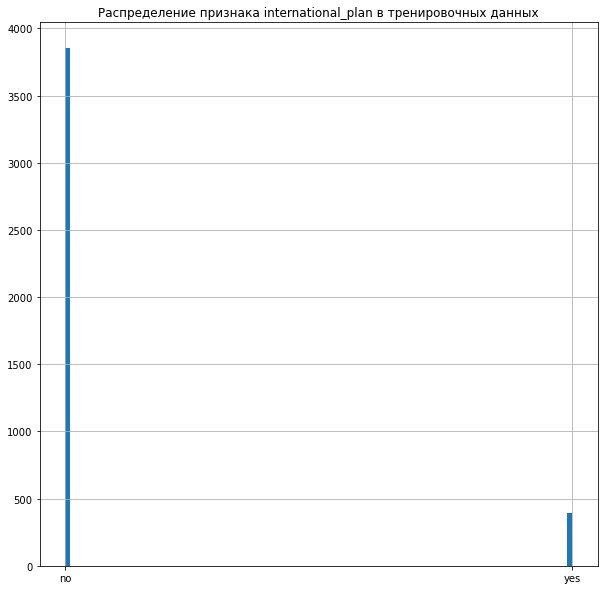

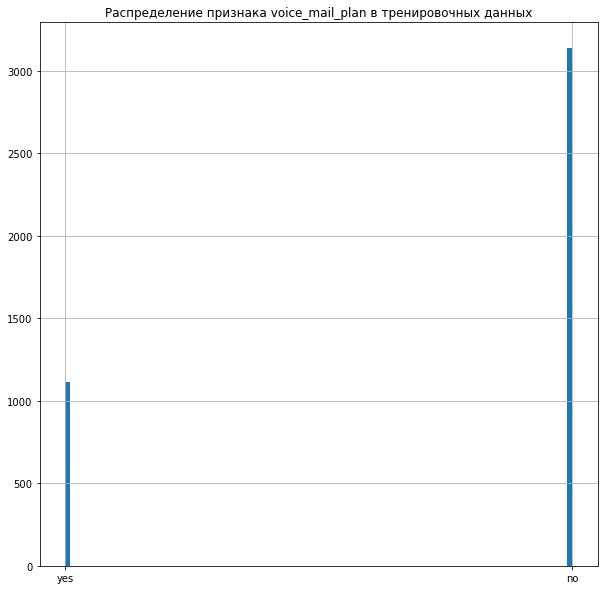

In [11]:
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    train_data[col].hist(bins = 100)

## Сравнение ушедших с оставшимися

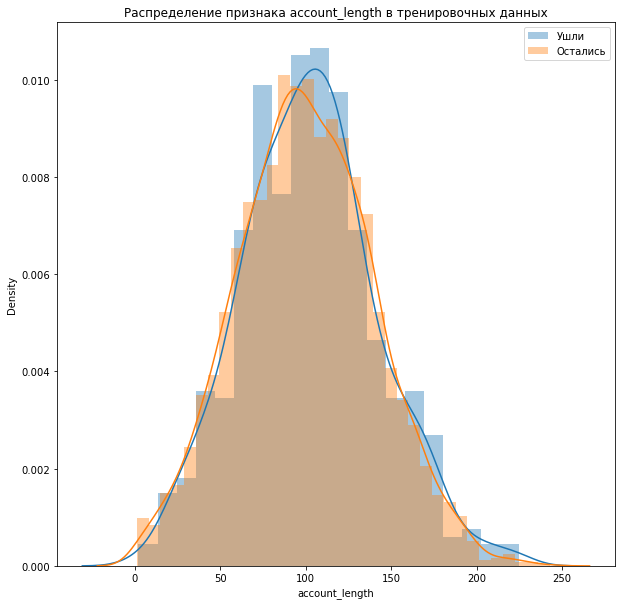

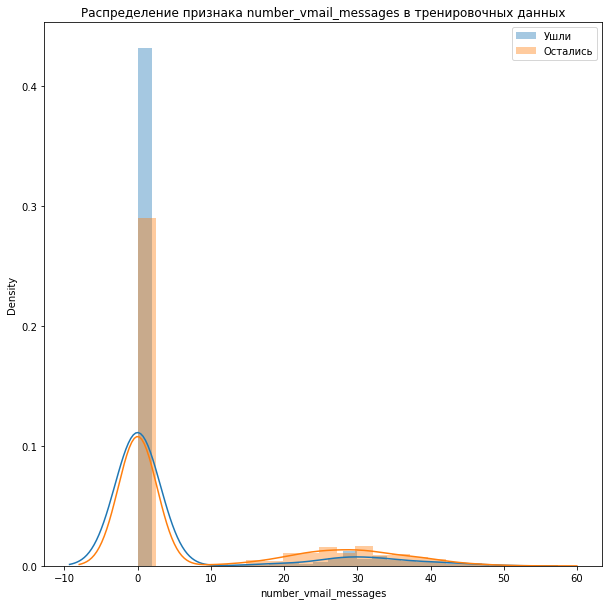

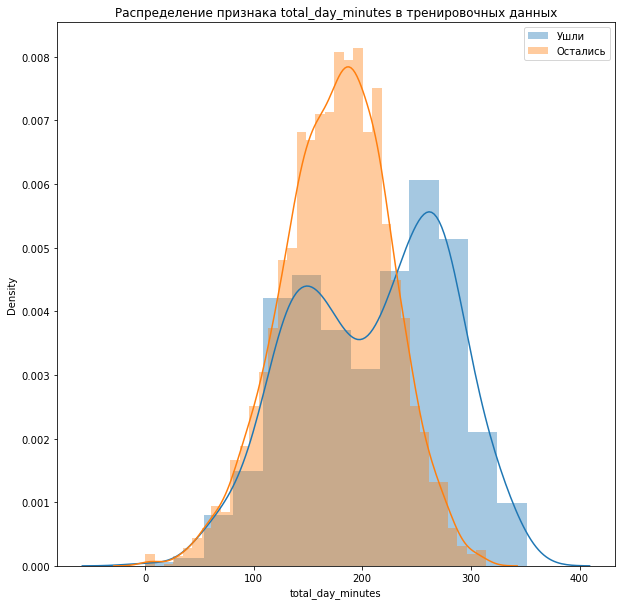

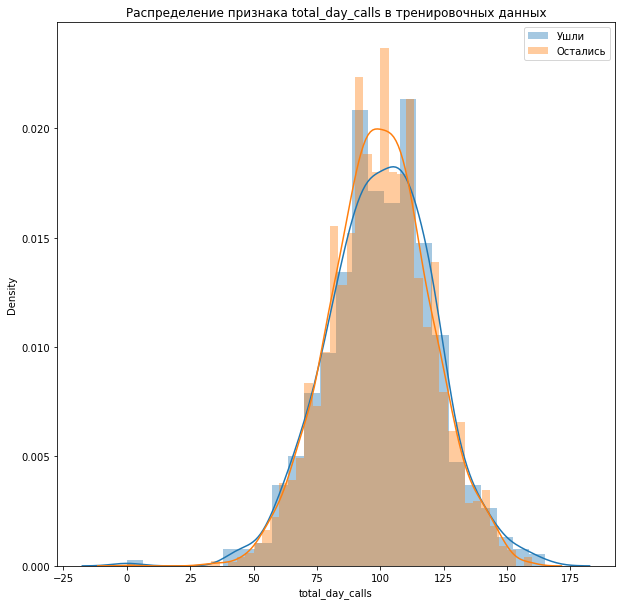

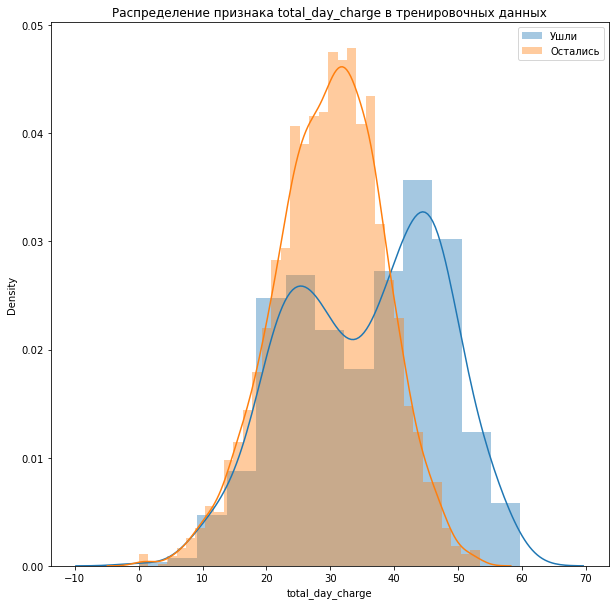

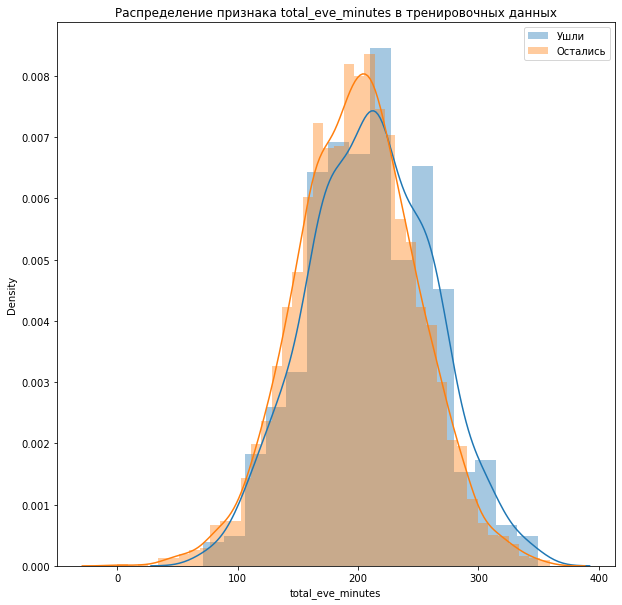

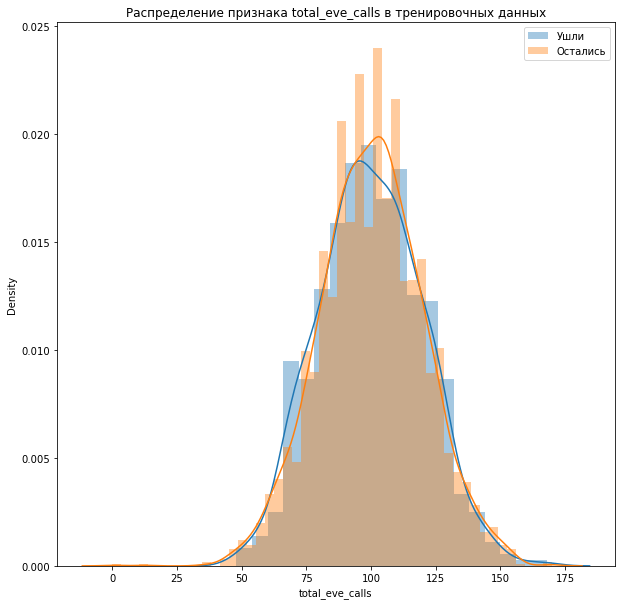

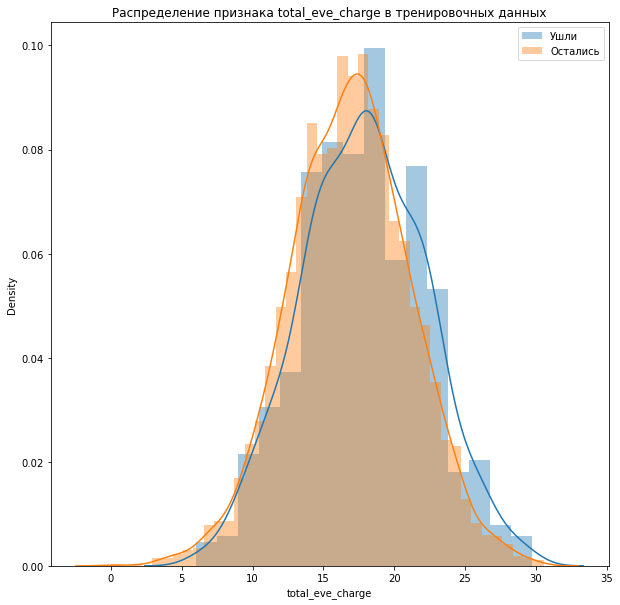

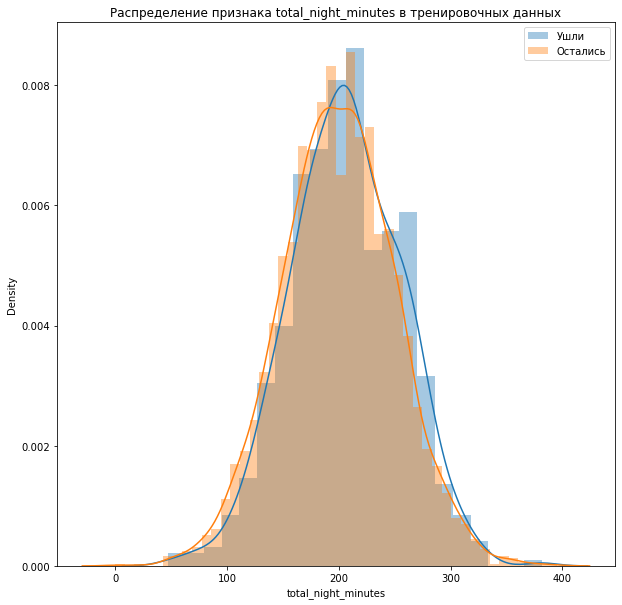

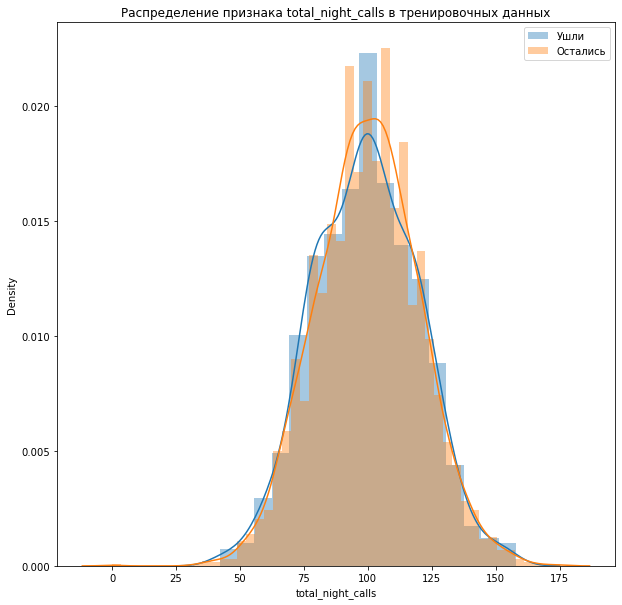

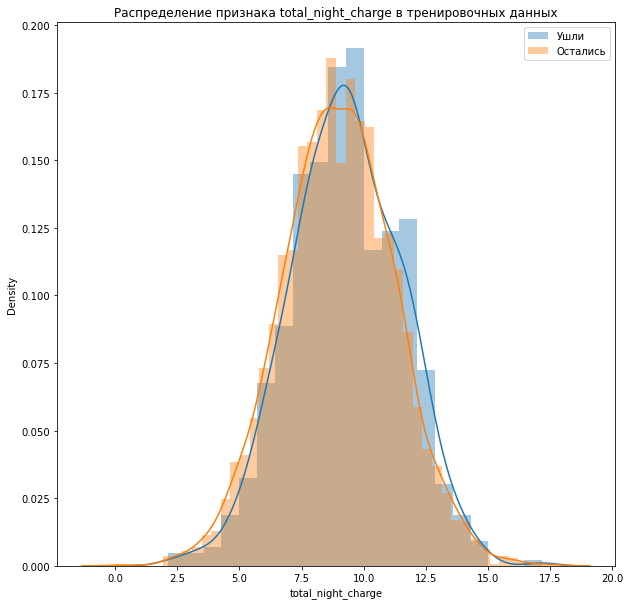

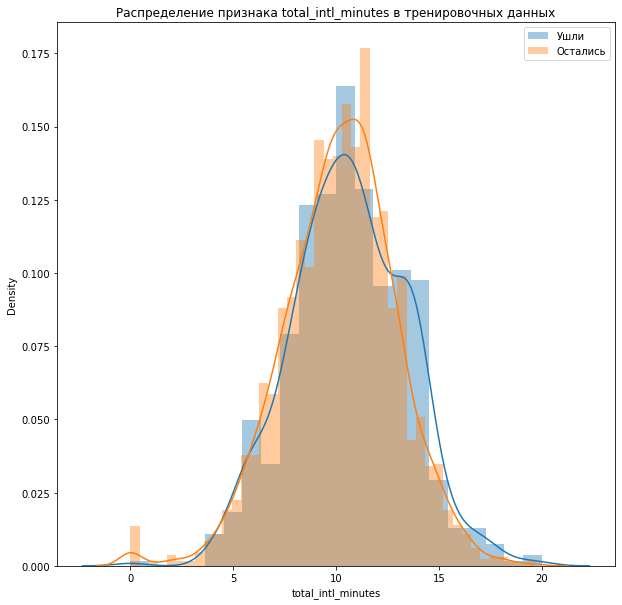

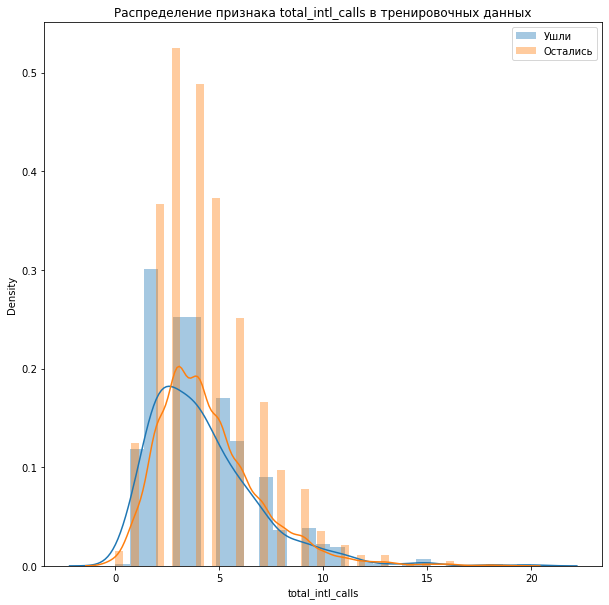

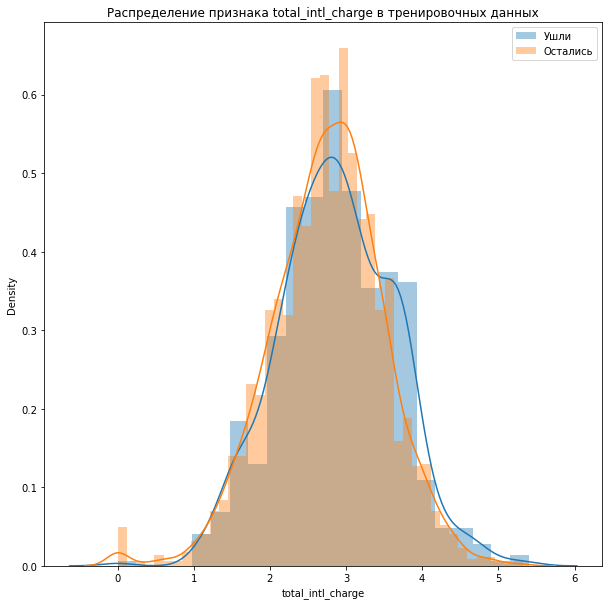

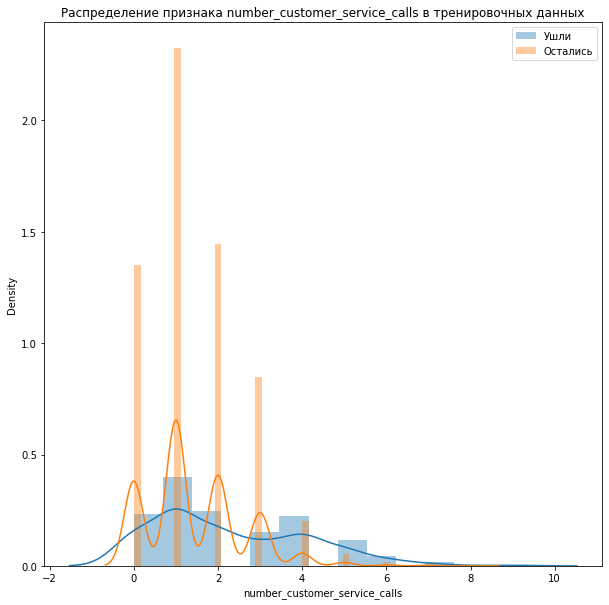

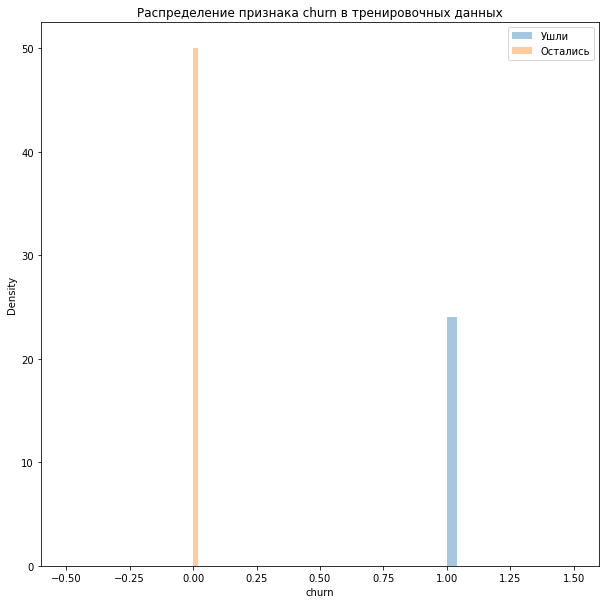

In [12]:
churn = train_data[train_data['churn'] == 1]
not_churn = train_data[train_data['churn'] == 0]


for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(churn[col], label = 'Ушли')
    sns.distplot(not_churn[col], label = 'Остались')   
    plt.legend()

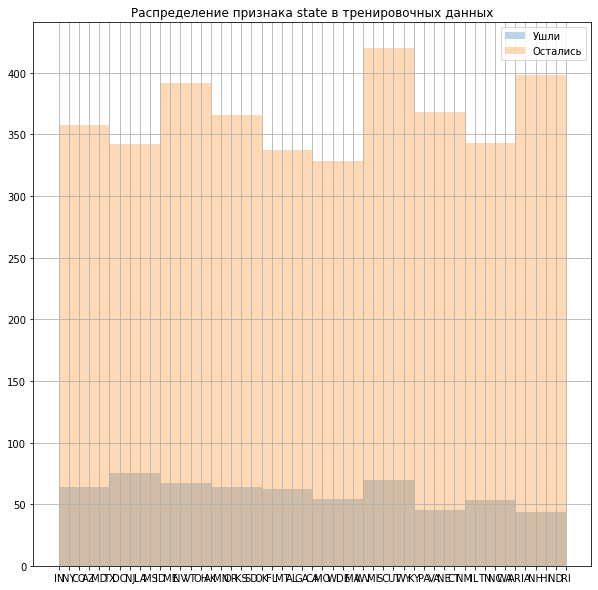

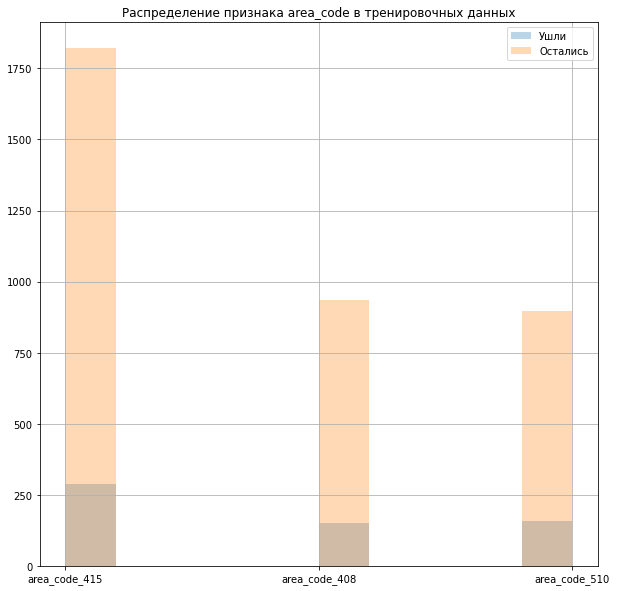

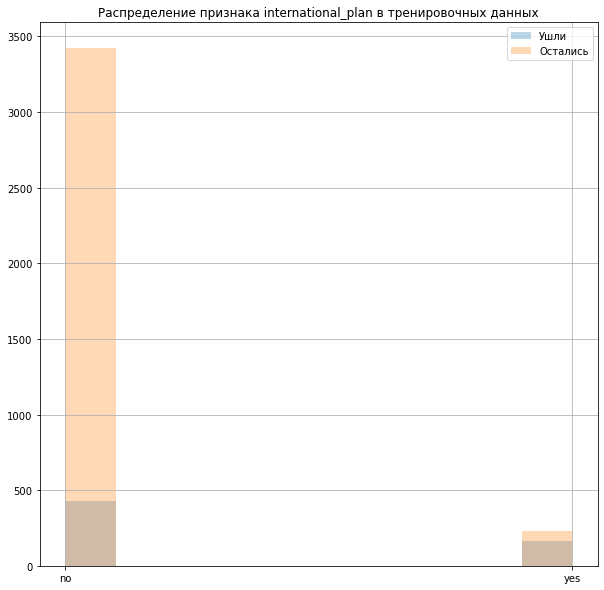

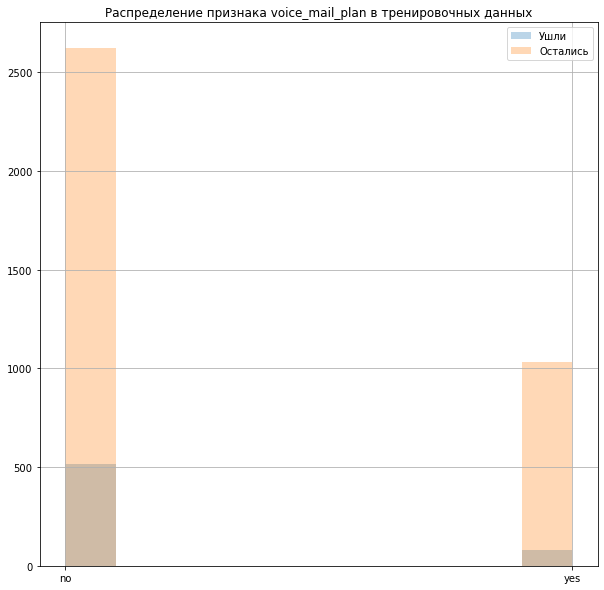

In [13]:
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    churn[col].hist(label = 'Ушли', alpha=0.3)
    not_churn[col].hist(label = 'Остались', alpha = 0.3)   
    plt.legend()

In [14]:
from pandas.plotting import scatter_matrix

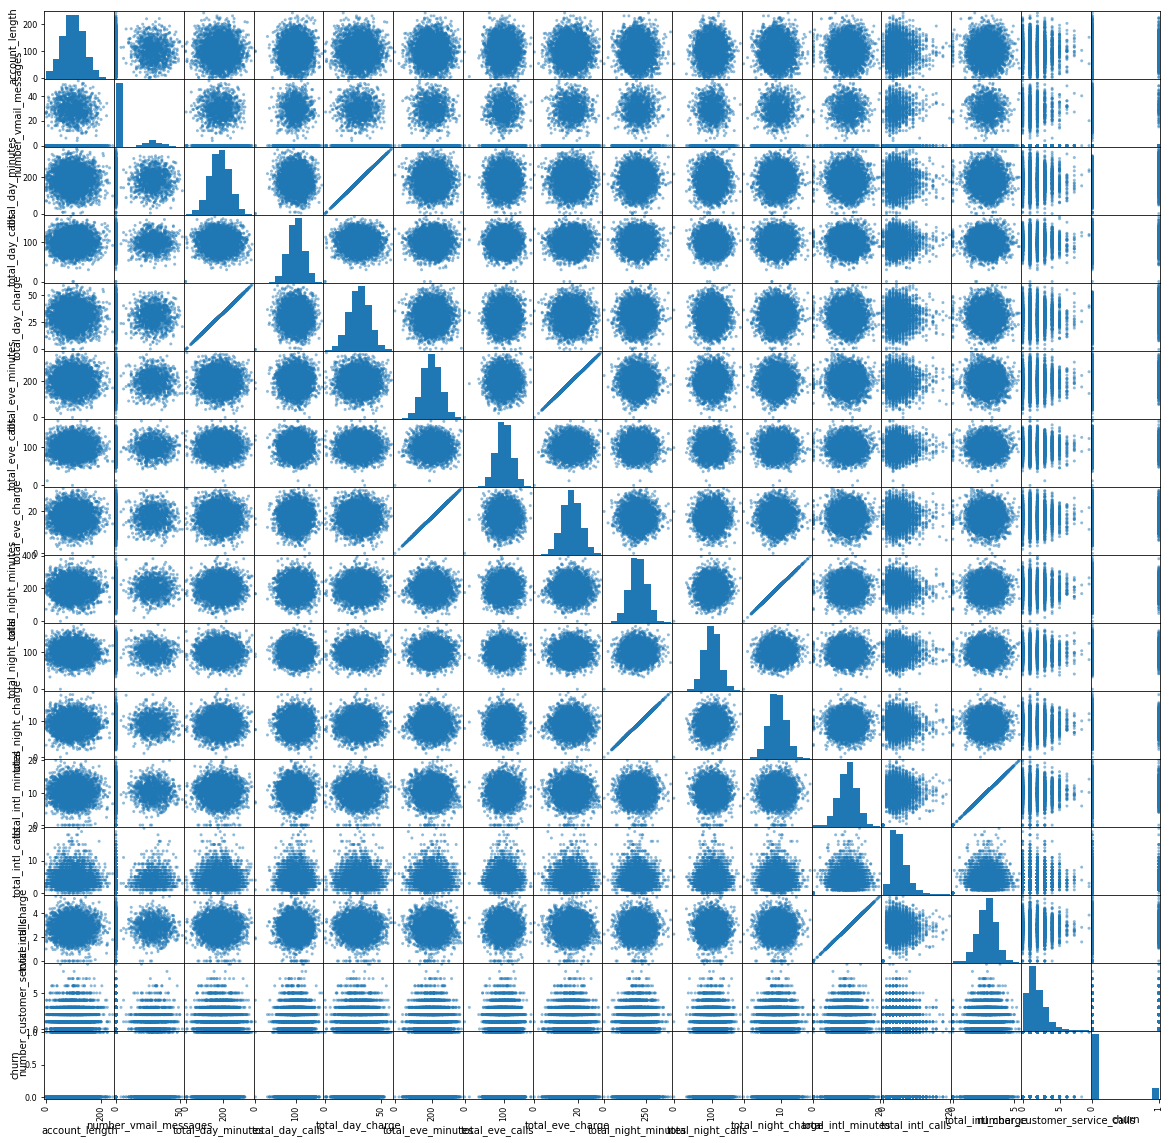

In [15]:
scatter_matrix(train_data[num_cols], figsize = (20, 20));

In [16]:
#Переведем еще 2 категриальных празнака в числовые
columns = ['international_plan', 'voice_mail_plan']
for col in columns:
    train_data[col] = train_data[col].apply(lambda x: 1 if x =='yes' else 0)    

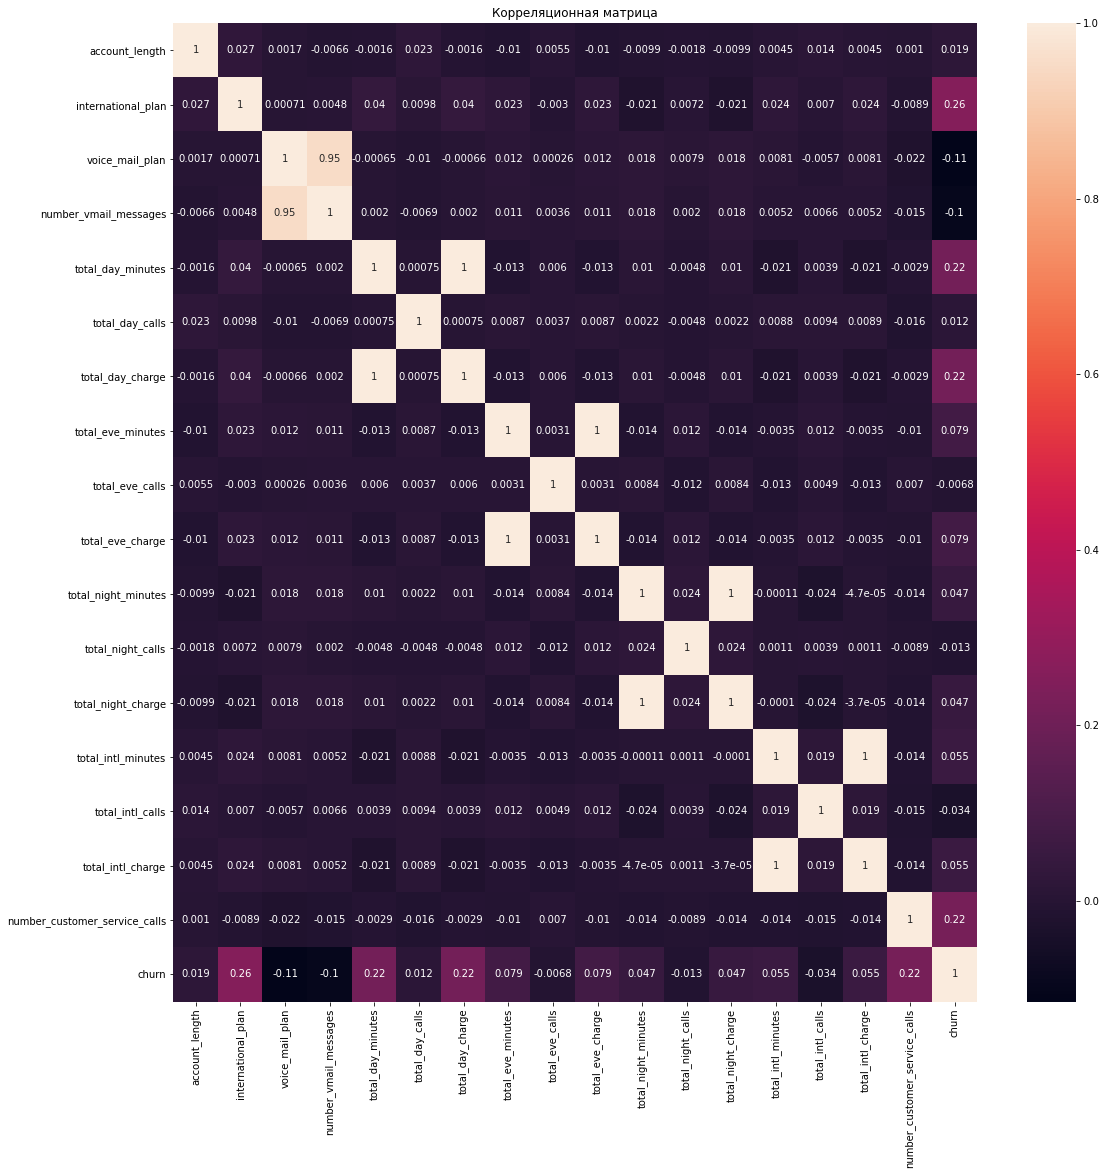

In [17]:
corr_m = train_data.corr()

# Визуализируем матрицу при помощи sns.heatmap
plt.figure(figsize = (18, 18))
plt.title('Корреляционная матрица')
sns.heatmap(corr_m, annot = True)
plt.show()

## Предобработка признаков

In [18]:
test_data = pd.read_csv('test.csv')
print(test_data.shape)

(750, 20)


In [19]:
columns = ['international_plan', 'voice_mail_plan']

In [20]:
for col in columns:
    test_data[col] = test_data[col].apply(lambda x: 1 if x == 'yes' else 0)

In [21]:
test_data.head(3)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4


### Кодировка через OneHotEncoding

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
ohe = OneHotEncoder() #OneHotEncoder(drop = 'first') - про drop First нужно изучить подробнее дополнительно

**Удалим 'id', т.к. это  лишний столбец, дублирующий индекс (номер строки в  данном случае)**

In [24]:
test_data = test_data.drop('id', axis = 1)

In [25]:
test_data.head(3)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,area_code_415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,AL,118,area_code_510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,IA,62,area_code_415,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4


In [26]:
num_cols_test = []
str_cols_test = []

cols_and_type_test = test_data.dtypes.to_dict()

for col in cols_and_type_test:
    if cols_and_type_test[col] in ('int64', 'float64'):
        num_cols_test.append(col)
    else: 
        str_cols_test.append(col)
        
print(num_cols_test)

['account_length', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [27]:
X = train_data.drop('churn', axis = 1)
y = train_data['churn']

**Т.к. дополнительную кодировку 2 параметров через lambda делали после разбивки на num_cols & str-cols в train_data, то теперь при Ohe нужно использовать сокращенный список по str_cols**

In [28]:
print('**train_data** ', str_cols, '\n', '**test_data** ', str_cols_test)

**train_data**  ['state', 'area_code', 'international_plan', 'voice_mail_plan'] 
 **test_data**  ['state', 'area_code']


In [29]:
str_cols[:-2]

['state', 'area_code']

In [30]:
X_ohe = ohe.fit_transform(X[str_cols[:-2]]) # OHE for train data X
test_data_ohe = ohe.transform(test_data[str_cols_test]) #OHE for test data

X_ohe, test_data_ohe

(<4250x54 sparse matrix of type '<class 'numpy.float64'>'
 	with 8500 stored elements in Compressed Sparse Row format>,
 <750x54 sparse matrix of type '<class 'numpy.float64'>'
 	with 1500 stored elements in Compressed Sparse Row format>)

In [31]:
X_ohe_data = pd.DataFrame(X_ohe.toarray(), columns = ohe.get_feature_names())
test_data_ohe_data = pd.DataFrame(test_data_ohe.toarray(), columns = ohe.get_feature_names())

In [32]:
X_ohe_data.head(3)

,x0_AK,x0_AL,x0_AR,x0_AZ,x0_CA,x0_CO,x0_CT,x0_DC,x0_DE,x0_FL,...,x0_UT,x0_VA,x0_VT,x0_WA,x0_WI,x0_WV,x0_WY,x1_area_code_408,x1_area_code_415,x1_area_code_510
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
test_data_ohe_data.head(3)

,x0_AK,x0_AL,x0_AR,x0_AZ,x0_CA,x0_CO,x0_CT,x0_DC,x0_DE,x0_FL,...,x0_UT,x0_VA,x0_VT,x0_WA,x0_WI,x0_WV,x0_WY,x1_area_code_408,x1_area_code_415,x1_area_code_510
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
list(test_data_ohe_data)[:3],[len(list(test_data_ohe_data))]

(['x0_AK', 'x0_AL', 'x0_AR'], [54])

In [35]:
test_data_ohe_data.shape, X_ohe_data.shape

((750, 54), (4250, 54))

In [36]:
test_data_ohe_data.columns.tolist()[:7]

['x0_AK', 'x0_AL', 'x0_AR', 'x0_AZ', 'x0_CA', 'x0_CO', 'x0_CT']

**Удалим категорийные столбцы из первоначальных датасетов (трейн и тест), чтобы на их место добавить закодированные данные**

In [37]:
X.drop(str_cols[:-2], axis = 1, inplace = True)
test_data.drop(str_cols_test, axis = 1, inplace = True)

In [38]:
# заменили строковые переменные из str_cols[:-2] и str_cols_test на значения Ohe
X[list(X_ohe_data)] = X_ohe_data
test_data[list(test_data_ohe_data)] = test_data_ohe_data 

### RandomOverSampler

In [39]:
import plotly.express as px
from collections import Counter

Counter({0: 3652, 1: 3652})


<AxesSubplot:>

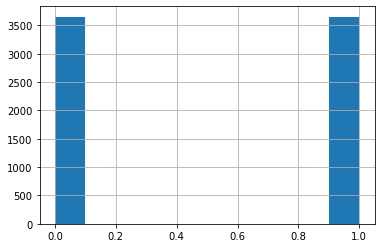

In [40]:
from imblearn.over_sampling import RandomOverSampler

# Создаем oversampler
ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(X, y)# новое распределение классов
print(Counter(y_ros))
y_ros.hist()

### Train-Test-Split и Стандартизация и масштабирование данных черех StandardScaler

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.2, random_state = 12345)

In [43]:
X.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,x0_UT,x0_VA,x0_VT,x0_WA,x0_WI,x0_WV,x0_WY,x1_area_code_408,x1_area_code_415,x1_area_code_510
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_sc = sc.fit_transform(X_train) # scaling тренировочной части тренировочных данных (train_data)
valid_data_sc = sc.transform(X_test) # scaling тестовой части тренировочных данных (train_data)

test_data_sc = sc.transform(test_data) # scaling тестовых данных (test_data, в ней изначально не было ЦелПерем)

In [45]:
X_sc = pd.DataFrame(X_sc, columns = list(X))

In [46]:
X_sc.head(3)

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,x0_UT,x0_VA,x0_VT,x0_WA,x0_WI,x0_WV,x0_WY,x1_area_code_408,x1_area_code_415,x1_area_code_510
0,0.503222,-0.453033,-0.507317,-0.486913,1.297417,-0.207838,1.297739,1.146958,0.315345,1.146090,...,-0.154371,-0.134617,-0.13658,-0.155529,-0.130607,-0.192604,-0.139158,-0.583740,1.019530,-0.585848
1,2.332954,-0.453033,-0.507317,-0.486913,-0.485480,-0.604021,-0.485617,0.174074,0.924304,0.172978,...,-0.154371,-0.134617,-0.13658,-0.155529,-0.130607,-0.192604,-0.139158,1.713091,-0.980844,-0.585848
2,-0.223657,2.207343,-0.507317,-0.486913,-2.079694,0.535004,-2.079914,-0.477798,1.330278,-0.478081,...,-0.154371,-0.134617,-0.13658,-0.155529,-0.130607,-0.192604,-0.139158,1.713091,-0.980844,-0.585848


In [47]:
test_data_sc = pd.DataFrame(test_data_sc, columns = list(X))

In [48]:
valid_data_sc = pd.DataFrame(valid_data_sc, columns = list(X))

## Обучение различных моделей

In [49]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, make_scorer, f1_score

from sklearn.model_selection import cross_validate, cross_val_score

## Logistic Regression

In [50]:
log_reg = LogisticRegression(C = 0.8, random_state = 42, max_iter = 500, class_weight = 'balanced') 
#'balanced' - борется с дисбалансом классов (один из вариантов)

In [51]:
scorer = make_scorer(roc_auc_score, needs_proba = True) #roc_auc_score - хорош при сильном дисбалансе классов (цел.перем.)

In [52]:
cv_log_reg = cross_validate(log_reg, X_sc, y_train, cv = 5, scoring = scorer, n_jobs = -1)
cv_log_reg

{'fit_time': array([0.07895875, 0.07696033, 0.06796408, 0.0959487 , 0.04597306]),
 'score_time': array([0.00899196, 0.00699377, 0.00799274, 0.00899458, 0.00399566]),
 'test_score': array([0.85315125, 0.84109244, 0.85138751, 0.81939472, 0.8342526 ])}

In [53]:
cv_log_reg

{'fit_time': array([0.07895875, 0.07696033, 0.06796408, 0.0959487 , 0.04597306]),
 'score_time': array([0.00899196, 0.00699377, 0.00799274, 0.00899458, 0.00399566]),
 'test_score': array([0.85315125, 0.84109244, 0.85138751, 0.81939472, 0.8342526 ])}

In [54]:
print("Результаты Логистической регрессии:", sum(cv_log_reg['test_score']) / len(cv_log_reg['test_score']))

Результаты Логистической регрессии: 0.8398557050438662


## Decision Tree Classifier

In [55]:
dec_tree = DecisionTreeClassifier(max_depth = 4, random_state = 42) # Можно найти более оптимальные гиперпараметры

In [56]:
cv_dec_tree = cross_validate(dec_tree, X_sc, y_train, cv = 5, scoring = scorer, n_jobs=-1)
cv_dec_tree

{'fit_time': array([0.04896879, 0.06796145, 0.05696774, 0.08694839, 0.07995319]),
 'score_time': array([0.01399398, 0.00699973, 0.03997684, 0.00499701, 0.0039978 ]),
 'test_score': array([0.89447908, 0.90376149, 0.90887829, 0.8711906 , 0.89117118])}

In [57]:
print("Результаты решающего дерева:", sum(cv_dec_tree['test_score']) / len(cv_dec_tree['test_score']))

Результаты решающего дерева: 0.8938961277904843


### Вариант с применением RandomizedSearchCV для Решающих деревьев

In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
params = { 
    'max_depth': range(1,20)
}

In [60]:
rscv_dt = RandomizedSearchCV( dec_tree, 
                  param_distributions= params, 
                  cv= 5,
                  n_iter = 50, 
                  scoring = scorer)

In [61]:
rscv_dt.fit(X_sc, y_train).best_estimator_

DecisionTreeClassifier(max_depth=16, random_state=42)

In [62]:
rscv_dt.fit(X_sc, y_train).best_score_

0.9676451831976258

## RandomForestClassifier

In [63]:
ran_for = RandomForestClassifier(max_depth = 10, n_estimators = 100, random_state = 42) 
# Можно найти более оптимальные гиперпараметры

In [64]:
cv_ran_for = cross_validate(ran_for, X_sc, y_train, cv = 5, scoring = scorer, n_jobs=-1)
cv_ran_for

{'fit_time': array([1.20531011, 1.21030807, 1.17133045, 1.17732501, 0.65562367]),
 'score_time': array([0.07995439, 0.06696057, 0.06296301, 0.05796576, 0.03398228]),
 'test_score': array([0.98664266, 0.98329138, 0.98358995, 0.97074753, 0.98593676])}

In [65]:
print("Результаты случайного леса дерева:", sum(cv_ran_for['test_score']) / len(cv_ran_for['test_score']))

Результаты случайного леса дерева: 0.9820416565032837


### Вариант с применением RandomizedSearchCV для Решающих деревьев

In [66]:
params = { 
    'max_depth': range(1,20),
    'n_estimators': range (50,500, 50)
}

In [67]:
rscv_rf = RandomizedSearchCV(ran_for , 
                  param_distributions = params, 
                  cv= 5,
                  n_iter = 100, 
                  scoring = scorer)

In [68]:
rscv_rf.fit(X_sc, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=10,
                                                    random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': range(1, 20),
                                        'n_estimators': range(50, 500, 50)},
                   scoring=make_scorer(roc_auc_score, needs_proba=True))

In [69]:
rscv_rf.best_estimator_

RandomForestClassifier(max_depth=19, n_estimators=400, random_state=42)

In [70]:
rscv_rf.best_score_

0.9979721328099596

**Как видно, лучший результат показал случайный лес**

## Интерпретация модели и важность признаков

In [71]:
log_reg.fit(X_sc, y_train)
print("Коэффициенты в линейной регрессии:", log_reg.coef_)

Коэффициенты в линейной регрессии: [[ 0.08923912  0.93274159 -0.94618185  0.49481295  0.4367883   0.03380508
   0.43557118  0.17215647 -0.01324729  0.17179911  0.09527021 -0.03860218
   0.09706812  0.10179702 -0.04040142  0.09855486  0.98655588 -0.08152862
  -0.05806618 -0.01678477 -0.05877504  0.18914471 -0.0642807   0.0669387
   0.01558798 -0.01583063 -0.05319382 -0.0344585  -0.14701857 -0.04522549
  -0.0045751  -0.12415314  0.05109387 -0.01235463  0.00939268  0.0332857
   0.00210878 -0.00351824  0.06742706  0.06459943  0.02949893 -0.03206045
   0.09098666  0.1537244  -0.08389947 -0.0827048  -0.07827515 -0.02265658
   0.1138008   0.01119226  0.03731983  0.03249504 -0.05569151  0.03163329
  -0.00546347  0.02719495 -0.10948888  0.09900695  0.09124431 -0.01784591
   0.09146822  0.02457632 -0.18521677 -0.09418422  0.11207646 -0.09957887
   0.0058268  -0.09914698  0.02100266 -0.0375495   0.02207264]]


In [72]:
pd.DataFrame(log_reg.coef_.reshape(-1,1), list(X_sc)).sort_values(by=0, ascending = False).head(20)

,0
number_customer_service_calls,0.986556
international_plan,0.932742
number_vmail_messages,0.494813
total_day_minutes,0.436788
total_day_charge,0.435571
x0_CA,0.189145
total_eve_minutes,0.172156
total_eve_charge,0.171799
x0_MT,0.153724
x0_NJ,0.113801


In [73]:
intercept = log_reg.intercept_

In [74]:
dec_tree.fit(X_sc, y_train)
print("Важность признаков решающего дерева", dec_tree.feature_importances_)

Важность признаков решающего дерева [0.         0.24233763 0.         0.0493269  0.         0.
 0.33314691 0.01894241 0.         0.04843144 0.         0.
 0.00234335 0.         0.0308082  0.         0.27130964 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00335352 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


In [75]:
pd.DataFrame(dec_tree.feature_importances_, list(X_sc)).sort_values(by = 0, ascending = False).head(20)

,0
total_day_charge,0.333147
number_customer_service_calls,0.271310
international_plan,0.242338
number_vmail_messages,0.049327
total_eve_charge,0.048431
total_intl_calls,0.030808
total_eve_minutes,0.018942
x0_NV,0.003354
total_night_charge,0.002343
account_length,0.000000


In [76]:
ran_for.fit(X_sc, y_train)
print("Важность признаков решающего дерева", ran_for.feature_importances_)

Важность признаков решающего дерева [0.022519   0.09694185 0.02929037 0.02980803 0.15863486 0.0207119
 0.16009634 0.03775559 0.01939988 0.04656505 0.02752619 0.01866233
 0.02790557 0.03584092 0.02821943 0.03380097 0.14500965 0.00093215
 0.00053621 0.0009876  0.00082464 0.00165511 0.00073995 0.00103001
 0.00142622 0.00035717 0.00090029 0.00042118 0.00146079 0.00076028
 0.00064473 0.00126981 0.00095942 0.00096508 0.00082689 0.00057132
 0.00062525 0.00167036 0.00084876 0.001223   0.00133518 0.00047943
 0.00128321 0.00196027 0.00101021 0.00103879 0.00078997 0.00083405
 0.00230932 0.0012558  0.00162454 0.00088056 0.00077117 0.00047265
 0.00060918 0.00091272 0.00119646 0.00076086 0.0012708  0.00075163
 0.00179732 0.00181441 0.00210137 0.00056203 0.00125566 0.00120521
 0.00076089 0.00100014 0.00220411 0.00288909 0.00253883]


In [77]:
pd.DataFrame(ran_for.feature_importances_, list(X_sc)).sort_values(by = 0, ascending =  False).head(20)

,0
total_day_charge,0.160096
total_day_minutes,0.158635
number_customer_service_calls,0.145010
international_plan,0.096942
total_eve_charge,0.046565
total_eve_minutes,0.037756
total_intl_minutes,0.035841
total_intl_charge,0.033801
number_vmail_messages,0.029808
voice_mail_plan,0.029290


## Validation и Prediction на выбранной моделе

**Выбрала Random Forest, т.к. эта модель показала самую высокую точность**

In [78]:
ran_for = RandomForestClassifier(max_depth = 19, n_estimators = 400, random_state = 42)

In [86]:
ran_for.fit(X_sc, y_train)

RandomForestClassifier(max_depth=19, n_estimators=400, random_state=42)

In [80]:
validate_pred = ran_for.predict(valid_data_sc)

In [81]:
a = pd.DataFrame({'preds ':validate_pred, 'fact ':y_test})

<AxesSubplot:ylabel='Count'>

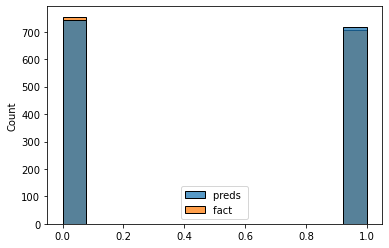

In [82]:
sns.histplot(a)

In [83]:
roc_auc_score(y_test, validate_pred)

0.9886038309288407

In [84]:
test_pred = ran_for.predict(test_data_sc)

array([[<AxesSubplot:title={'center':'predicted_churn '}>]], dtype=object)

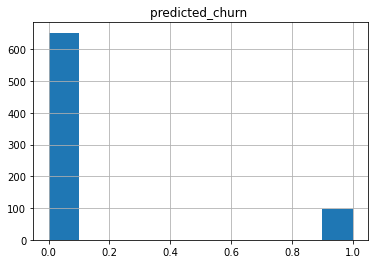

In [85]:
b = pd.DataFrame({'predicted_churn ':test_pred})
b.hist()

In [87]:
test_data_pred = pd.concat([test_data, b], axis = 1)
test_data_pred

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,x0_VA,x0_VT,x0_WA,x0_WI,x0_WV,x0_WY,x1_area_code_408,x1_area_code_415,x1_area_code_510,predicted_churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,118,1,0,0,223.4,98,37.98,220.6,101,18.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,62,0,0,0,120.7,70,20.52,307.2,76,26.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,93,0,0,0,190.7,114,32.42,218.2,111,18.55,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,174,0,0,0,124.3,76,21.13,277.1,112,23.55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,130,0,0,0,119.4,99,20.30,226.3,97,19.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
746,73,0,0,0,177.2,118,30.12,270.5,84,22.99,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
747,152,0,0,0,184.2,90,31.31,256.8,73,21.83,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
748,61,0,0,0,140.6,89,23.90,172.8,128,14.69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


## Выводы по параметрам датасета

- Существуетвысокая корреляция между параметрами 'Total_day(/eve/night/intl)_minutes' и 'Total_day(/eve/night/intl)_charge'. Это взаимозависимые параметры и если анализировать один из показатпелей minutes с соответствующим показателем charge, то это можно считать data leakage;
<br>
<br>
- Churn: 
<br>`положительная корреляция`: international_plan, total_day_minutes, total_day_charge, number_customer_service_calls. 
<br>`отрицательный коэффициент корреляции (обратная корреляция)`: voice_mail_plan, total_intl_calls.

- самые весрмые параметры для выбранной модели:

In [88]:
pd.DataFrame(ran_for.feature_importances_, list(X_sc)).sort_values(by = 0, ascending =  False).head(20)

,0
total_day_minutes,0.134674
total_day_charge,0.133414
number_customer_service_calls,0.127592
international_plan,0.075827
total_eve_charge,0.049248
total_eve_minutes,0.048466
total_intl_charge,0.038430
total_intl_minutes,0.036750
total_night_minutes,0.035842
total_night_charge,0.035418
